In [1]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
import matplotlib.pyplot as plt
import os
import glob

'''
search_result = search_targetpixelfile("KIC 8462852", mission='TESS')
tpfs = search_result.download(quality_bitmask='hardest')
last_pixelfile = tpfs
tpfs
'''

tic_id = 261136679
star_directory = f"TIC_{tic_id}"
print(star_directory)

base_dir = os.path.join(os.getcwd(), "data", "TESS_Downloads", star_directory)
fits_files = glob.glob(os.path.join(base_dir, '**', '*_lc.fits'), recursive=True)
print(base_dir)
print(fits_files)

TIC_261136679
/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TESS_Downloads/TIC_261136679
['/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TESS_Downloads/TIC_261136679/mastDownload/TESS/tess2023153011303-s0066-0000000261136679-0260-s/tess2023153011303-s0066-0000000261136679-0260-s_lc.fits', '/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TESS_Downloads/TIC_261136679/mastDownload/TESS/tess2021014023720-s0034-0000000261136679-0204-s/tess2021014023720-s0034-0000000261136679-0204-s_lc.fits', '/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TESS_Downloads/TIC_261136679/mastDownload/TESS/tess2021146024351-s0039-0000000261136679-0210-s/tess2021146024351-s0039-0000000261136679-0210-s_lc.fits', '/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TESS_Downloads/TIC_261136679/mastDownload/TESS/tess2023018032328-s0061-0000000261136679-0250-s/tess2023018032328-s0061-0000000261136679-0250-s_lc.fits', '/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TES

/home/preston/Desktop/Exoplanet-Hunt/Jupyter_tests/data/TESS_Downloads/TIC_261136679/mastDownload/TESS/tess2018292075959-s0004-0000000261136679-0124-s/tess2018292075959-s0004-0000000261136679-0124-s_lc.fits


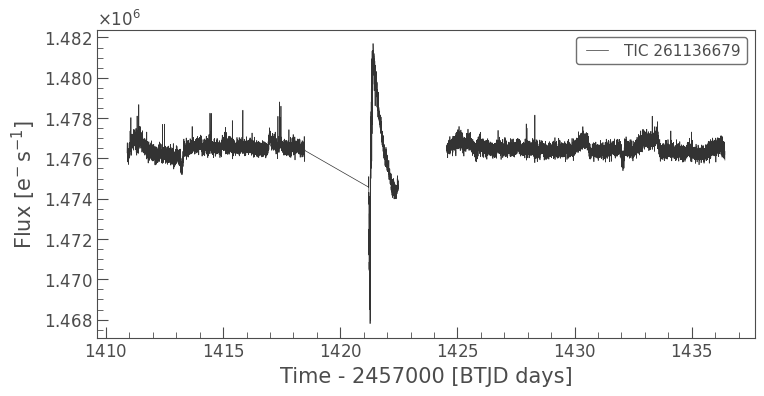

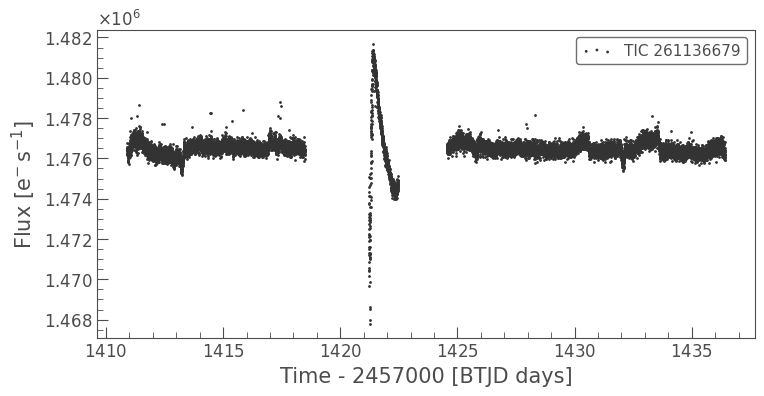

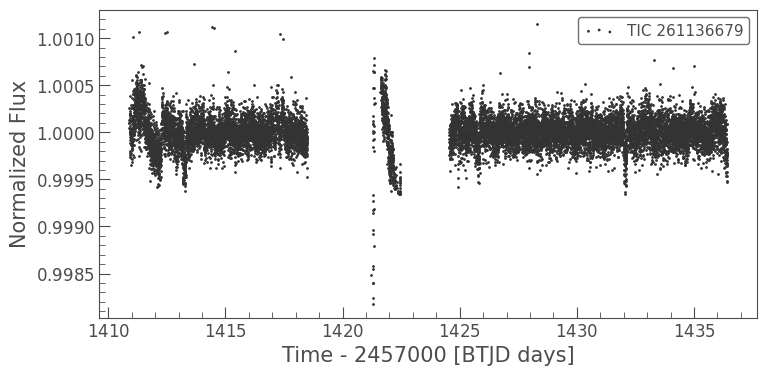

In [12]:
lc_path = fits_files[4]
print(lc_path)
lc = lk.read(lc_path)
lc.plot()
plt.show()

lc.scatter()
plt.show()

lc = lc.remove_nans().remove_outliers()

flat_lc = lc.flatten(window_length=1200)
flat_lc.scatter()
plt.show()

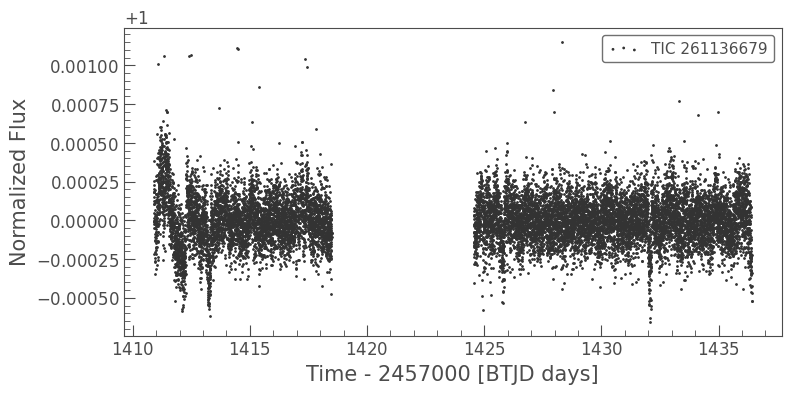

In [13]:
jd_time = flat_lc.time.jd
mask = ((jd_time < (2457000+1420)) | (jd_time > (2457000+1424)))&((jd_time < (2457000+1346)) | (jd_time > (2457000+1350)))
masked_lc = flat_lc[mask]

masked_lc.scatter()
plt.show()

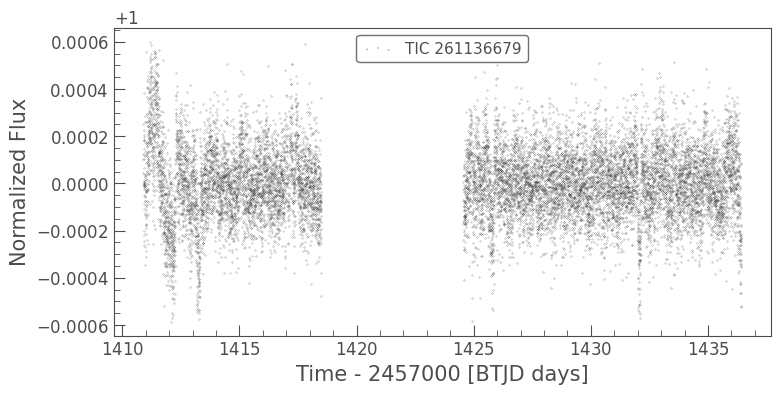

In [14]:
clipped_lc = masked_lc.remove_outliers(sigma=4)
clipped_lc.scatter(s=0.1)
plt.show()

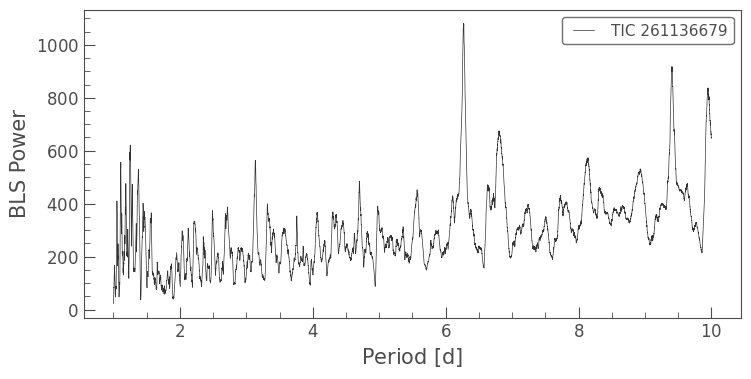

In [15]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method='bls', period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

Best fit period: 6.27100 d


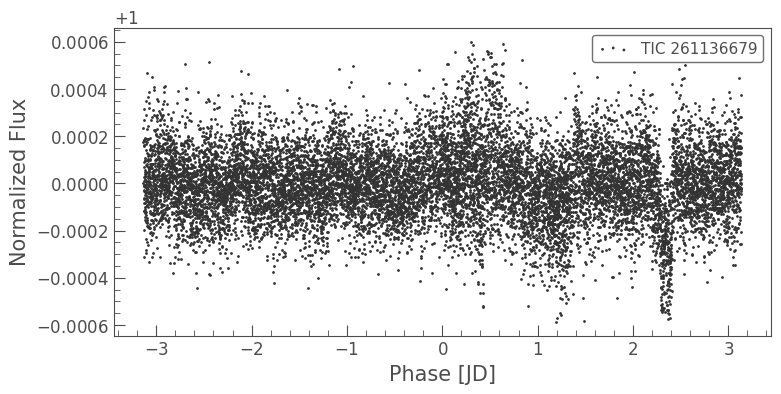

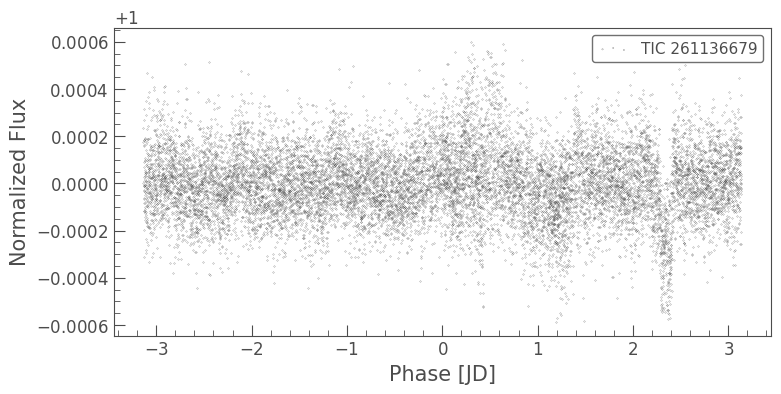

In [16]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

clipped_lc.fold(best_fit_period).scatter()
plt.show()

folded_lc = clipped_lc.fold(best_fit_period)
folded_lc.scatter(s=0.1)
plt.show()

/tmp/ipykernel_11565/4009299660.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=3)


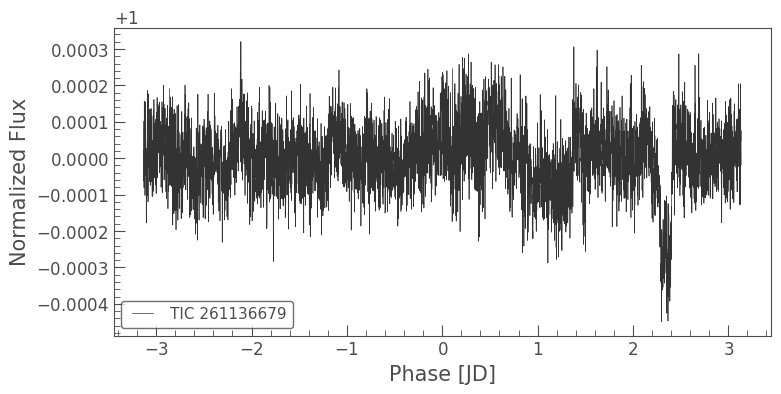

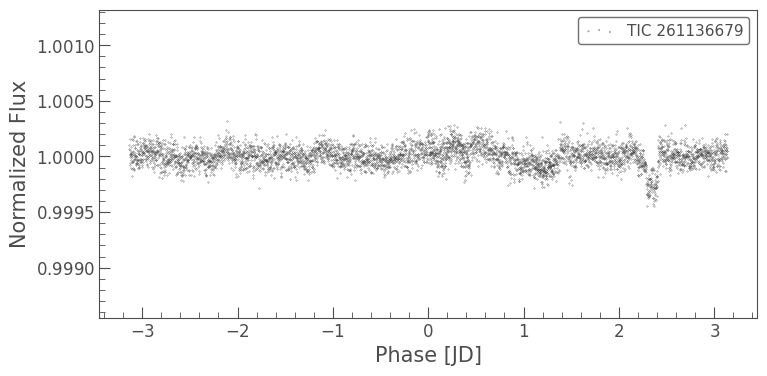

In [18]:
binned_lc = folded_lc.bin(binsize=3)
binned_lc.plot()
binned_lc.scatter(s=0.2)
plt.ylim([min(binned_lc.flux) - 0.001, max(binned_lc.flux) + 0.001])
plt.show()